# **<center>Projet Algorithme Avancés</center>**
# **<center>Groupe 1</center>**

# <div style="background-color: white;"><center>![CESI_LOGO](./images/cesi_300.jpg)</center></div>

<p style="text-align:left;">
    Delage Tanguy
    <span style="float:right;">
        Coutant Clémentine
    </span>
</p>

<p style="text-align:left;">
    Cormier Mathieu
    <span style="float:right;">
        Fevre Thomas
    </span>
</p>

-----------------------------------------------
***********************************************

## 1. Contextualisation
    
Le transport de marchandises est l'une des plus grandes raisons de la pollution mondiale. C'est aujourd'hui l'un des plus gros problèmes pour l'environnement, chaque année, les consommateurs achètent davantage des biens de diverses provenances lointaines et ils consomment de moins en moins localement. Cette pollution implique l'entièreté des pays du globe, c'est pour cela qu'ils s'impose plus ou moins des objectifs et engagements sur le long terme pour réduire les émissions carbones.<br><br>
C'est l'Agence de l’Environnement et de la Maîtrise de l’Énergie (ADEME) qui lance un appel à la manifestation d'intérêt général pour promouvoir la mise en place de solutions/expérimentations pour la mobilité des personnes et des marchandises.
Notre structure de CesiCDP, est bien implantée dans le domaine de la mobilité multimodale intelligente. C'est pourquoi notre équipe est chargée de répondre à cet appel. Cette étude repose sur les nouvelles technologies d'optimisation de transport de marchandises. Les bénéfices de cette solution seront autant économiques, qu'écologiques. Ces problèmes de logistique du transport présentent un enjeu pour l'avenir et ses applications sont nombreuses. Ainsi, leur impact sur l'environnement peut être véritablement significatif.
L'objectif de cette étude est de permettre la génération d'un trajet de livraison au plus optimal en exploitant un algorithme qui sera implémenté en langage de programmation. La solution permettra d'identifier les différents points de livraisons suivant un ordre défini en respectant certaines contraintes et en optimisant la durée totale de livraisons journalière.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Modélisation du problème
### 2.1 Le problème de tounrées de véhicules avec capacité

Dans le problème de tournées de véhicules (VRP), l'objectif est de trouver des itinéraires optimaux pour plusieurs véhicules visitant un ensemble de lieux. Lorsqu'il n'y a qu'un seul véhicule, cela se réduit au problème du vendeur itinérant (TSP).

Mais qu'entend-on par "routes optimales" pour un VRP ? Il s'agit de l'itinéraire présentant la plus petite distance totale sachant qu'un camion ne peut passer qu'une seule fois par ville. Cependant, s'il n'y a pas d'autres contraintes, la solution optimale est d'affecter un seul véhicule à la visite de tous les emplacements et de trouver l'itinéraire le plus court pour ce véhicule. Il s'agit essentiellement du même problème que le TSP.

Dans notre cas, nous avons une contrainte supplémentaire qui n'est autre que la capacité des camions. Un deuxième objectif s'ajoute alors, la minimisation du nombre de camions nécessaires pour livrer tous les colis.

### 2.2 Illustration par un exemple

Nous avons réalisé un graphe permettant de visualiser le problème posé, prenant cinq villes de gironde et leur distance respectives :

# ![graph](./images/graph.png)

### 2.3 Modélisation mathématique

<u>Données d'entrées</u> 
* $n$ le nombre de villes
* $N$ l'ensemble des villes, avec $N = \{1,2,...,n\}$ 
* $k$ le nombre de camions
* $K$ l'ensemble des camions attribués, avec $K  = \{1,2,...,k\}$
* $V$ l'ensemble des noeuds, soit $\{0\} \cup N$ ($\{0\}$ étant le dépot)
* $A$ l'ensemble des arrêtes, avec $A = \{(i,j) \in V^2 : i \ne j\}$ 
* $t_{ij}$ est le temps de trajet entre i et j $\in A$
* $C$ capacité (3D) des véhicules en $m^2$ 
* $l$ l'ensemble des catégories de volumes de colis
* $L$ un dictionnaire associant les catégories de volumes au nombre de colis à livrer, avec $S = \{ l_{i}$ : nombre de colis 1, ...$ \} \forall i \in l$

<u>Variables de décisions</u>
* $x_{ij}^k$ = $\left\{\begin{array}{ll} 
        1  & \text{parcourue}  \\
        0 & \text{non parcourue} \\
    \end{array}
\right.
$ : indique si le camion $k$ est passé par la route $a_{ij}$

* $y_{i}^k$ : indique le nombre de colis de la catégorie $i$ transportés par le camion $k$

<u>Fonctions objectifs</u>

1. On souhaite dans un premier temps minimiser le nombre de camions pour livrer tous les colis : $min(k)$
2. Dans un second temps, on veut minimiser la somme des distances parcourues par tous les véhicules : $min(\sum_{ij\in A} t_{ij}x_{ij}^k)$


<u>Contraintes</u>

* chaque camion part du dépôt : $\sum_{j \in V}x_{oj}^k = 1, \forall k \in K$
* chaque camion revient au dépôt : $\sum_{j \in V}x_{jo}^k = 1, \forall k \in K$
* un seul passage par ville : $\sum_{k \in K} \sum_{i \in V, i \ne j} x_{ij}^k = 1, \forall j \in V /\ \{0\}$
* le volume occupé de chaque véhicule ne doit pas dépasser sa capacité $C$ : $ \sum_{i \in l}y_{i}^k \le C, \forall k \in K$


---------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Complexité
### 3.1 C'est quoi une classe de complexité ?
La complexité d'un algorithme, décrit un ordre de grandeur de la rapidité d'exécution de celui-ci. Ici, on ne parle pas de temps d'exécution mais uniquement d'un ordre de grandeur qui va permettre de comparer l'efficacité de plusieurs algorithmes entre eux.

Une classe de complexité est un ensemble de problème qui partage des complexités semblables. En déterminant la classe de complexité de notre problème, nous allons pouvoir cibler la ou les méthodes de résolutions les plus adaptées à ce dernier.

### 3.2 Problèmes connus
Nous allons nous aider de plusieurs problèmes déjà connus dans le but de trouver la classe de complexité de notre problème grâce à des réductions polynomiales. Le principe de la réduction polynomiale est de partir d'un problème connu pour arriver à un autre problème en passant par une ou plusieurs étapes de transformation. Ainsi le problème réduit est dans la même classe de complexité que le problème de base.

Si A se réduit à B alors B est au moins aussi difficile que A.

**Voici donc, les problèmes connus dont nous allons nous aider dans notre cas :**

* **<u>Le cycle Hamiltonien</u>** 

    Un cycle hamiltonien est une boucle fermée sur un graphe où chaque nœud (sommet) est visité exactement une fois. De cet énoncé, nous pouvons déduire un problème de décision qui est le suivant : chaque sommet du graphe a-t-il été parcouru une et une seule fois ?

    Ce problème fait partie de la classe de complexité NP-complet.

* **<u>Le problème du voyageur de commerce</u>**

    Dans ce problème, un voyageur de commerce doit visiter plusieurs villes en passant une et une seule fois par chacune d'entre elles, et en minimisant la distance totale parcourue. Plus formellement, un TSP est modélisé sous forme d'un graphe où les sommets représentent les villes à visiter, et les arêtes les liaisons entre ces villes. La pondération ou le poids associé à chaque arête représente le coût de la liaison entre les deux villes et correspond généralement à la distance qui les sépare. L'objectif est de trouver un cycle hamiltonien, c'est à dire un cycle passant une et une seule fois par tous les sommets du graphe, et de longueur minimale.

    La différence de ce problème avec le cycle hamiltonien est que les arrêtes sont pondérées. Par conséquent, un problème d'optimisation s'ajoute au problème de décision : la somme des arrêtes parcourues est-elle inférieure à k ? (k étant un l'objectif d'optimisation)

    En tant que problème d'optimisation, le TSP est un problème NP-difficile. Cependant, en tant que problème de décision, il est de la classe NP-complet.

* **<u>Le "capacitated vehicle routing problem" ou CVRP</u>** 

    Dans sa version la plus basique dite Capacitated VRP (CVRP) ou VRP avec contraintes de capacité, une flotte de véhicules de capacité fixée, basée dans un dépôt, doit assurer des tournées entre plusieurs villes ayant demandé chacun une certaine quantité de marchandises. L'ensemble des clients visités par un véhicule désigne la tournée de celui-ci. Chaque client doit être desservi une et une seule fois et chaque tournée commence et se termine au dépôt. L'objectif du CVRP est de minimiser le coût total, c'est-à-dire la somme des distances ou des temps de parcours des tournées, tout en respectant la contrainte de capacité des véhicules :

    Problème de décision -> La tournée a-t-elle été assurée en respectant la contrainte de capacités des camions ?
    
    Problème d'optimisation -> Il s'agit du même que celui du problème précédent (TSP)

### 3.3 Démonstration 

En termes décisionnel, le problème du voyageur de commerce est le même qu'un cycle hamiltonien. Le problème du voyageur de commerce est donc NP-Complet.

Ensuite, résoudre le VRP équivaut à résoudre k fois le problème du voyageur de commerce (k étant le nombre de camions disponibles). Le VRP est donc au moins aussi difficile que le TSP (voyageur de commerce) et par conséquent au moins NP-Complet.

Enfin, pour notre problème, se rajoute la condition de capacité des camions qui est donc le CVRP. Le remplissage des camions est un problème de décision qui se résout en temps polynomial, il est donc dans P. Le CVRP revient donc au VRP avec cette condition de capacité un problème de décision dans P. Le CVRP est par conséquent au moins aussi difficile que le VRP et ainsi est dans la classe NP-Complet.

On en déduit que le problème d'optimisation lié est NP-difficile.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## **4. Méthode de résolution**

### **4.1 Algorithme génétique**

Étant donné que le problème que l'on cherche à résoudre appartient à NP, on ne peut le résoudre rapidement pour avoir une solution optimale. Cependant, il existe des méthodes itératives nous permettant d'approximer une solution optimal rapidement. Ces méthodes s'appellent les métaheuristiques. Il en existe de toute sorte, mais dans notre cas, nous allons nous focaliser sur un type en particulier que sont les algorithmes génétiques.

<br>

C'est alors que vous vous demanderez peut-être, pourquoi les algorithmes génétiques ?

Les algorithmes génétiques font partie de la grande famille des algorithmes évolutionnistes qui offrent l’avantage de fournir des solutions de très grande qualité en un temps raisonnable. En revanche, l’inconvénient est qu’il n’y a aucune garantie que la solution soit l’optimum global.

<br>

Mais alors, comment fonctionnent de tels algorithmes ?

Les algorithmes génétiques utilisent la théorie de Darwin sur l’évolution des espèces. 
Elle repose sur trois principes : le principe de variation, le principe d'adaptation et le principe d'hérédité.

Ce paradigme, associé avec la terminologie de la génétique, nous permet d’exploiter les algorithmes génétiques : nous retrouvons les notions de Population, d’Individu, de Chromosome et de Gène.

* **La population** est l’ensemble des solutions envisageables.
* **L’individu** représente une solution.
* **Le Chromosome** est une composante de la solution.
* **Le Gène** est une caractéristique, une particularité.

Avec ces notions, nous obtenons trois opérateurs d’évolution…

* **La sélection** : choix des individus les mieux adaptés.
* **Le croisement** : mélange par la reproduction des particularités des individus choisis.
* **La mutation** : altération aléatoire des particularités d'un individu.

Ci-dessous, une petite illustration en pseudo-code :




> début
>> définition de la population initiale
>>
>> si nombre de générations $\le$ nombre maximal
>>> sélection naturelle
>>>
>>> croisement & mutation
>>>
>>> prochaine génération
>>>
>> sinon
>>> solution finale
>>>
> fin







### **4.2 Implémentation en python**
#### 4.2.1 Importation des modules

In [1]:
import numpy as np
import numpy.random as rnd
import random
import seaborn as sns
import networkx as nx 
import matplotlib.pyplot as plt
import pulp

#### 4.2.2 Définition des paramètres

In [36]:
# number of cities
n = 20
# number of nodes      
v = n+1     
# number of individual in each generation    
popSize = 6

# number of genetic iterations
generations = 1000
# number of packages to be delivered 
packages = 50

# list of packages 
l = [1, 3, 5, 8] 
# trucks capactity
truckCapacity = 20

# traffic's coefficients boundaries
traffic = [1.7, 2.2]

#### 4.2.3 Calcul du nombre de camions optimal

In [37]:
def PackagesDistri(packages:int) -> dict:
    """Distribution of packages between volumes categories"""
    # create dictionnary to be returned
    L = {}
    # fill dictionnary
    L[0] = rnd.randint(0, int(packages/2))
    L[1] = rnd.randint(0, int(packages-L[0]))
    L[2] = rnd.randint(0, int(packages-(L[0]+L[1])))
    L[3] = packages-(L[0]+L[1]+L[2])
    # then return it
    return L

In [38]:
def CalcTruckNb(pkgDistri:dict) -> int:
    """Calculate the optimal number of trucks depending on pkgDistri"""
    truckNb = 1
    occupied = 0
    
    while any(x != 0 for x in pkgDistri.values()):

        i = 3
        occupied = 0

        for _ in range(pkgDistri[i]):
            if occupied + l[i] < truckCapacity and pkgDistri[i] > 0:
                occupied += l[i]
                pkgDistri[i] -= 1
            elif i > 0:
                for j in range(i-1, -1, -1):
                    for _ in range(pkgDistri[j]):
                        if occupied + l[j] < truckCapacity and pkgDistri[j] > 0:
                            occupied += l[j]
                            pkgDistri[j] -= 1

        for j in range(i-1, -1, -1):
            for _ in range(pkgDistri[j]):
                if occupied + l[j] < truckCapacity and pkgDistri[j] > 0:
                    occupied += l[j]
                    pkgDistri[j] -= 1

        truckNb += 1 
    return truckNb

In [39]:
# dictionnary of packages distributions between categories in l
L = PackagesDistri(packages)
# calculation of number of trucks
k = CalcTruckNb(L)
# display the result
print(f"Number of trucks needed : {k}")

Number of trucks needed : 8


#### 4.2.4 Génération de la matrice des distances

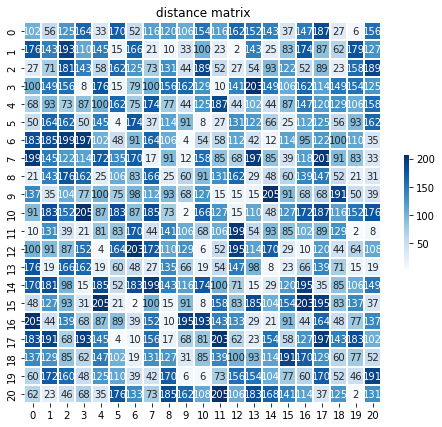

In [40]:
# matrix of distances randomly initiated
A = rnd.randint(low=1, high=100, size=(v,v)) * rnd.uniform(traffic[0], traffic[1])

# displaying distances matrix
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(A, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.title('distance matrix')
plt.show()

#### 4.2.5 Génération de la population initiale

In [41]:
def Population() -> list:
    # create empty population
    pop = []
    # iterate over individuals
    for _ in range(0, popSize):
        # generate random successors
        rndSucc = random.sample(range(1, v), v-1)
        # generate random header (corresponding to trucks)
        rndHead = random.sample(range(1, v-1), k-1)
        # add result to population
        pop.append([rndSucc, rndHead])
    # return population
    return pop

#### 4.2.6 Détermination des scores d'une population (et tri)

In [42]:
def CalcFitness(individual:list) -> int:
    """Calculate the fitness of a given individual"""
    fitness = 0
    # copy individual to avoid conflicts
    succ = individual[0].copy()
    head = individual[1].copy()
    
    # add arrival/departure to depository between trucks
    for index in head:
        for i in range(0,2):
            succ.insert(index, 0)

    # add departure of first truck and arrival of last one
    succ.append(0)
    succ.insert(0, 0)
    # iterate over successors
    for i in range(len(succ)-1):
        fitness += A[succ[i]][succ[i+1]]
    # return fitness value
    return fitness

def SortFitness(pop:list) -> list:
    """Sort fitness in given population from best to worst"""
    pop.sort(key=CalcFitness, reverse=False)
    return pop

#### 4.2.7 Croisement de la population

In [43]:
def Crossover(pop:list) -> list:
    """Partially mapped crossover between best fitness and the rest of a given population"""
    # assign best fitness to parent 1
    parent1 = pop[0]
    # add it to new population
    newPop = [parent1]
    # iterate over second parents in population
    for i in range(1, len(pop)):
        # assign second parent
        parent2 = pop[i]
        # randomly select the portion to cross
        rndStartIdx = rnd.randint(0, len(parent1[0])-2)
        rdnLength = rnd.randint(2, (len(parent1[0]))-rndStartIdx)
        # mapping list
        idxList = list(range(rndStartIdx, rndStartIdx+rdnLength))

        # create successors list with values of parent1
        succ = [parent1[0][i] if i in idxList else 0 for i in range(len(parent1[0]))]
        # then fill the rest with parent2 values
        for i in range(0, len(parent2[0])):
            if succ[i] == 0:
                if parent2[0][i] not in succ:
                    succ[i] = parent2[0][i]
                # else if value is already in successors
                else:
                    # try each value of parent2 that were overwritten
                    for j in idxList:     
                        if parent2[0][j] not in succ:
                            succ[i] = parent2[0][j]

        # randomly select between parent1's head and parent2's head
        rndTruckIdx = rnd.randint(0, 1)
        head = parent1[1] if rndTruckIdx == 0 else parent2[1]
        newPop.append([succ, head])
    # return new population
    return newPop

#### 4.2.8 Mutation de la population

In [44]:
def Mutation(pop:list) -> list:
    """Mutation process on given population (switch two randomly chosen successors)"""
    # iterate over individuals in population
    for individual in pop[1:]:
        # randomly select two indexes to be switched
        rndIdx1 = rnd.randint(0, len(individual[0])-1)
        rndIdx2 = rnd.randint(0, len(individual[0])-1)

        # switch values placed at those indexes
        tmp = individual[0][rndIdx1]
        individual[0][rndIdx1] = individual[0][rndIdx2]
        individual[0][rndIdx2] = tmp
    # return resulted population
    return pop

#### 4.2.9 Boucle principale de l'algorithme génétique

In [45]:
# assign initial population
pop = Population()
# set the counter of iterations
iter = 0
# set best score to high value
bestScore = 999999

# looping until number of generations is reached
while iter < generations:
    # genetic operations
    pop = SortFitness(pop)
    pop = Crossover(pop)
    pop = Mutation(pop)

    # creating new population for next generation
    newPop = []
    pop = SortFitness(pop)
    # iterate over populations
    for i in range(len(pop)):
        # keep 2 best thirds of population
        if i < (2*len(pop)/3):
            newPop.append(pop[i])
        # randomly generate the rest
        else:
            # create a new random individual
            randomCircuit = random.sample(range(1, v), v-1)
            rndTruck = random.sample(range(1, v-1), k-1)
            # and append it to population
            newPop.append([randomCircuit, rndTruck])

    # keep track of best score over generations
    if CalcFitness(pop[0]) != bestScore:
        bestScore = CalcFitness(pop[0])
        # print(bestScore)
    iter+=1

print(f"Final result : {bestScore}")

Final result : 1946.9303228343044


### **4.3 Qualité de la solution**

In [46]:
# set problem
problem = pulp.LpProblem('CVRP', pulp.LpMinimize)

# set variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(v) for j in range(v)), lowBound=0, upBound=1, cat='Binary')

# set objective function
problem += pulp.lpSum([A[i, j] * x[i, j] for i in range(v) for j in range(v)])

# set constrains
# no route from i to i
for i in range(v):
    problem += x[i, i] == 0
# 1 visit per city
for i in range(1, v):
    problem += pulp.lpSum(x[j, i] for j in range(v)) == 1
    problem += pulp.lpSum(x[i, j] for j in range(v)) == 1
        
problem += pulp.lpSum(x[i, 0] for i in range(v)) == k
problem += pulp.lpSum(x[0, i] for i in range(v)) == k

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 1014.9775350383526)

### **4.4 Visualisation de la solution**

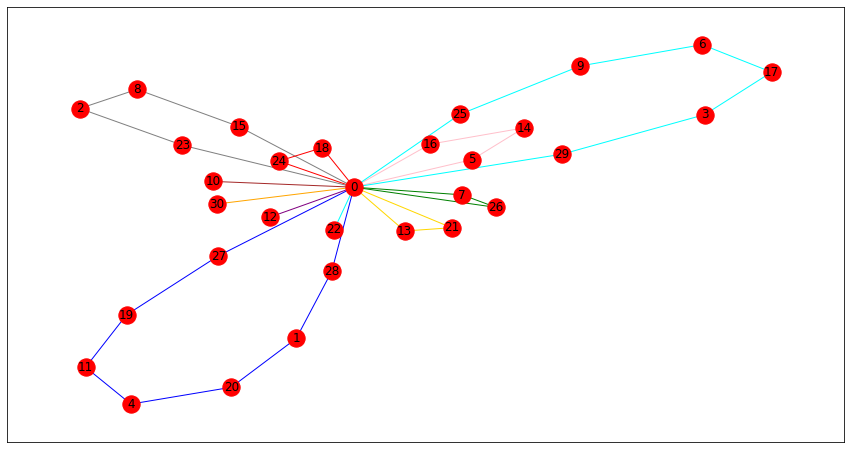

In [13]:
from Genetic_YT.graphVisu import *
graph(pop[0])

### **4.5 Évolutions des solutions en fonction des paramètres** 

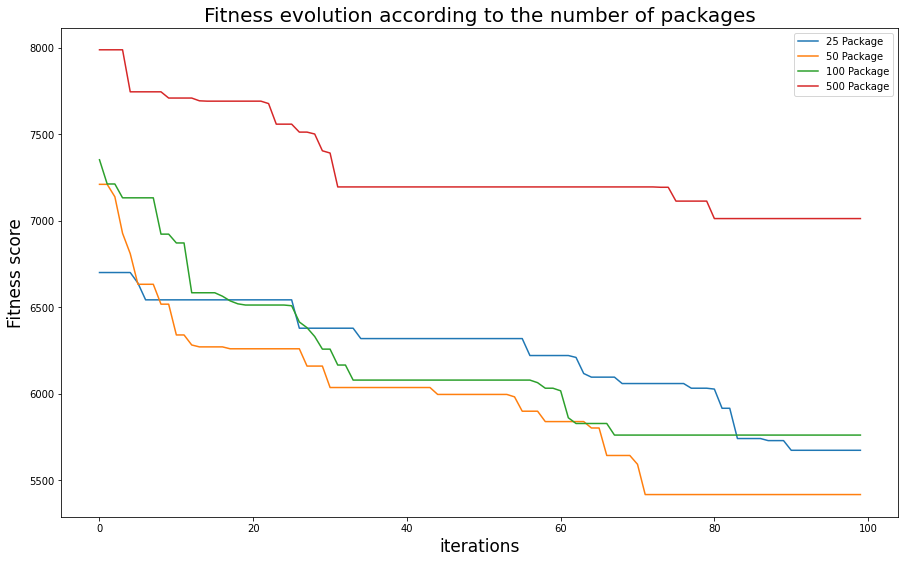

In [18]:
from Stats import colis
colis.statsColis()

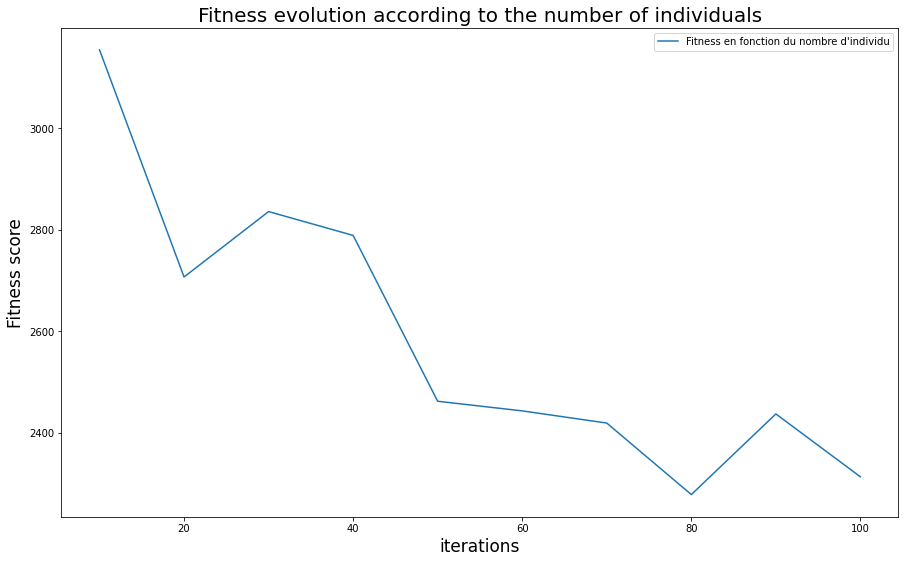

In [47]:
from Stats import individu
individu.Stat()

<u>Conclusion</u> : On peut en conclure que le minimum d'individus est de 40, pour obtenir de meilleurs résultats.

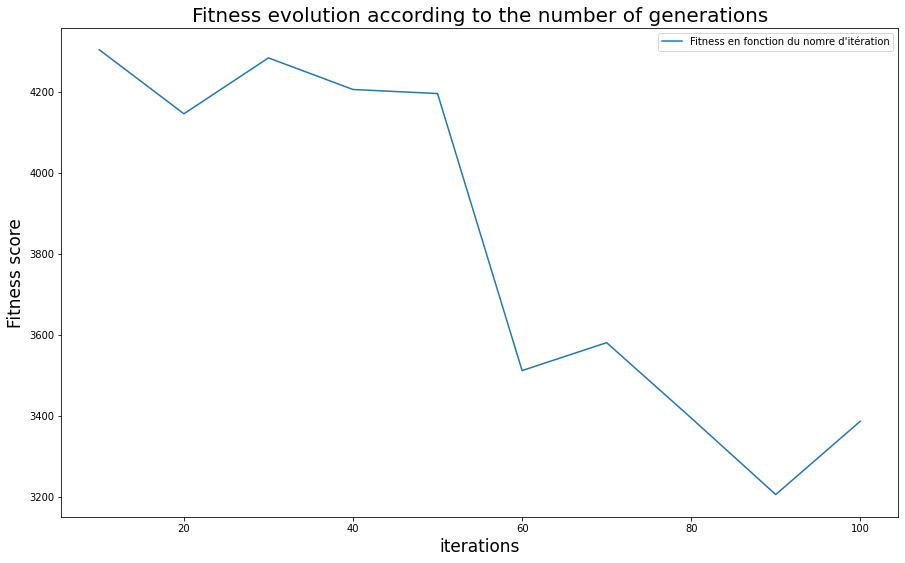

In [48]:
from Stats import iteration
iteration.Stat()

<u>Conclusion</u> : On peut remarquer une amélioration constante des résultats quand le nombre d'itération augmente, même si la différence tend à se réduire après plusieurs centaines d'itérations

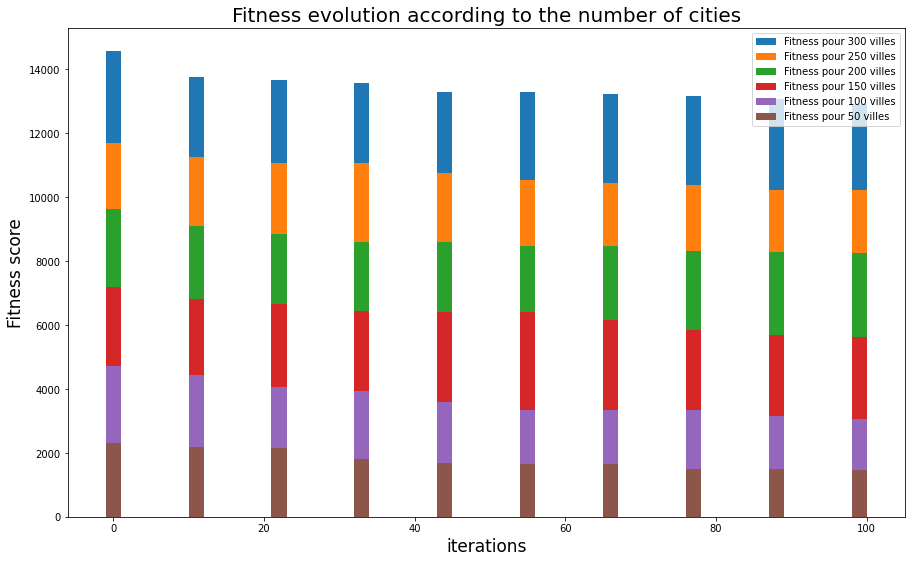

In [49]:
from Stats import villes
villes.Stat()

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## **5. Références bibliographiques**

https://hal.archives-ouvertes.fr/hal-03595390/file/IMENE_BENCHETTA.pdf

https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_tourn%C3%A9es_de_v%C3%A9hicules

https://emrahcimren.github.io/operations%20research/Solving-Single-Depot-Capacitated-Vehicle-Routing-Problem-Using-Column-Generation-with-Python/

http://igm.univ-mlv.fr/~dr/XPOSE2013/tleroux_genetic_algorithm/fonctionnement.html

https://www.kaggle.com/code/itoeiji/solving-tsp-and-vrp-by-mip-using-pulp/notebook

https://www.youtube.com/watch?v=ncj_hBfRt-Y&ab_channel=ThibaultNeveu